In [ ]:
# Caso di studio: Titanic

In [ ]:
# Import delle librerie
import pandas as pd

In [ ]:
# Leggo dal CSV
data = pd.read_csv("titanic.csv")

In [5]:
# Stampo i primi cinque record del dataset
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [18]:
# Stampo le informazioni su righe e colonne del dataset
data.shape

(887, 7)

In [7]:
# Stampo i nomi delle colonne
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses',
       'Parents/Children', 'Fare'], dtype=object)

In [8]:
# Calcolo la media dell'età dei passeggeri
data['Age'].mean()

29.471443066516347

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

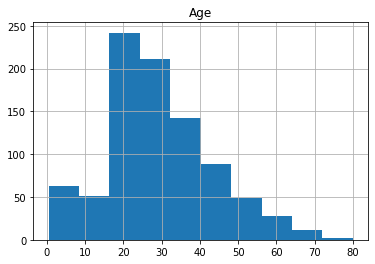

In [40]:
# Visualizzo l'età dei passeggeri tramite un istogramma a barre
data.hist(column="Age")

Text(0.5, 0, 'Age (in Years)')

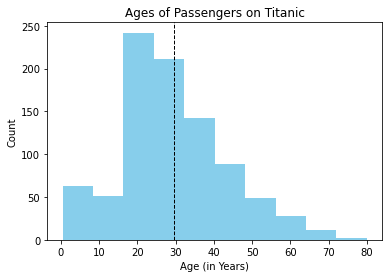

In [45]:
# Uso matplotlib per rappresentare l'eta dei passeggeri
import matplotlib.pyplot as plt

# Creazione dell'istogramma
plt.hist(data.Age, color = "skyblue")
# Definizione dei dati da rappresentare
plt.axvline(data.Age.mean(), color='k', linestyle='dashed', linewidth=1)
# Titolo del grafico
plt.title('Ages of Passengers on Titanic')
# Etichetta dell'asse y
plt.ylabel('Count')
# Etichetta dell'asse x
plt.xlabel('Age (in Years)')

plt.savefig("ages_passengers_titanic.png")

In [10]:
# Calcolo della correlazione: misura di quanto due o più attributi di uno stesso gruppo abbiano la tendenza a variare insieme

# Correlazione tra i sopravvissuti e l'età
correlation = data['Survived'].corr(data['Age'])

'''
# 1 = esiste una correlazione, per cui se uno dei due attributi aumenta, anche l'altro aumenta proporzionalmente
# -1 = esiste una correlazione inversa, per cui se uno dei due attributi aumenta, l'altro diminuisce proporzionalmente
# 0 = non esiste correlazione tra i due attributi
'''
# Stampa correlazione
correlation

-0.059665126330250055

In [ ]:
# Stampa delle righe dalla 1 alla 4 della colonna "Survived" e "Age"
data.loc[1:4, ["Survived", "Age"]]

In [16]:
# Converte la colonna "Sex" in due colonne dove "female" e "male" sono associati a valori binari che il sistema può interpretare
data['Sex'].str.get_dummies()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [49]:
'''
str.get_dummies crea variabili fittizie (intere) che corrispondono ai valori della stringa e corrwith è un altro modo per calcolare la correlazione quando è necessario farlo tra una combinazione di righe e colonne (corr funziona solo con le colonne).
'''
data['Sex'].str.get_dummies().corrwith(data['Survived']/data['Survived'].max())

female    0.542152
male     -0.542152
dtype: float64

In [50]:
data.corr()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [65]:
'''
Donne e bambini? Conosciamo tutti il vecchio detto che quando una nave sta affondando,  "donne e bambini prima di tutti" nelle scialuppe di salvataggio. Questo vecchio modo dire rispecchia la realtà dei sopravvissuti sul Titanic? Sono sopravvissute più donne e bambini degli uomini adulti? Il sesso, l'età o la classe delle persone contavano di più sul Titanic per la loro sopravvivenza? '''

'\nDonne e bambini? Conosciamo tutti il vecchio detto che quando una nave sta affondando,  "donne e bambini prima di tutti" nelle scialuppe di salvataggio. Questo vecchio modo dire rispecchia la realtà dei sopravvissuti sul Titanic? Sono sopravvissute più donne e bambini degli uomini adulti? Il sesso, l\'età o la classe delle persone contavano di più sul Titanic per la loro sopravvivenza? '

In [20]:
children = data[data['Age'] < 16]
children.shape

(94, 7)

In [21]:
children.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
7,0,3,male,2.0,3,1,21.0750
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000
14,0,3,female,14.0,0,0,7.8542
16,0,3,male,2.0,4,1,29.1250


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Siblings/Spouses'}>],
       [<AxesSubplot:title={'center':'Parents/Children'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

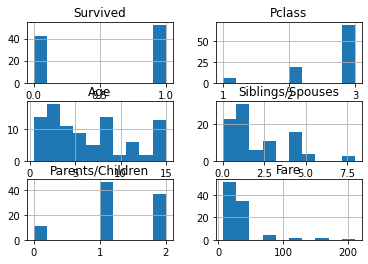

In [53]:
children.hist()

Survived            52
Pclass              52
Sex                 52
Age                 52
Siblings/Spouses    52
Parents/Children    52
Fare                52
dtype: int64

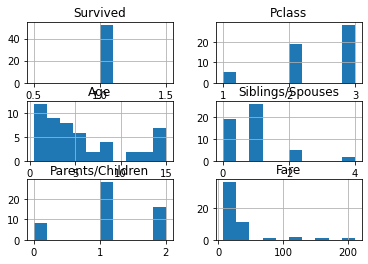

In [22]:
living_children = data[(data['Age'] < 16) & (data['Survived'] == 1)]
living_children.hist()
living_children.count()

In [56]:
not_surviving_children = data[(data['Age'] < 16) & (data['Survived'] == 0)]
not_surviving_children
not_surviving_children.count()

Survived            42
Pclass              42
Sex                 42
Age                 42
Siblings/Spouses    42
Parents/Children    42
Fare                42
dtype: int64

In [59]:
# Probabilità di sopravvivenza se donna o bambino

women_and_children = data[(data['Sex'] == "female") | (data['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    71.50838
0    28.49162
Name: Survived, dtype: float64

In [26]:
data.shape

(887, 7)

In [27]:
data[data['Survived']==1].count()

Survived            342
Pclass              342
Sex                 342
Age                 342
Siblings/Spouses    342
Parents/Children    342
Fare                342
dtype: int64

In [64]:
# Probabilità di sopravvivenza se uomo

adult_men = data[(data['Sex'].str.match('male')) & (data['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    83.527132
1    16.472868
Name: Survived, dtype: float64

In [ ]:
# Meno di 1 uomo su 5 sul Titanic è sopravvissuto.

# Quasi 4 donne su 5 sul Titanic sono sopravvissute.

In [67]:
surviving_men = data[(data['Sex'] == "male") & (data['Age'] > 16) & (data['Survived'] == 1)]
surviving_men.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,85.0,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.0,1.917647,33.870588,0.247059,0.105882,43.108041
std,0.0,0.953836,11.459856,0.485648,0.378705,78.590480
min,1.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,26.000000,0.000000,0.000000,8.050000
50%,1.0,2.000000,32.000000,0.000000,0.000000,26.550000
75%,1.0,3.000000,40.000000,0.000000,0.000000,52.554200
max,1.0,3.000000,80.000000,2.000000,2.000000,512.329200


In [68]:
dead_men = data[(data['Sex'] == "male") & (data['Age'] > 16) & (data['Survived'] == 0)]
dead_men.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,431.0,431.000000,431.000000,431.000000,431.000000,431.000000
mean,0.0,2.436195,32.738979,0.266821,0.146172,21.581291
std,0.0,0.777586,12.761624,0.804516,0.532199,33.466723
min,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,22.500000,0.000000,0.000000,7.775000
50%,0.0,3.000000,29.000000,0.000000,0.000000,8.662500
75%,0.0,3.000000,40.000000,0.000000,0.000000,24.150000
max,0.0,3.000000,74.000000,8.000000,5.000000,263.000000
